In [17]:
import pandas as pd
import seaborn as sns

In [18]:
dt = pd.read_csv("/content/wine-clustering.csv")

In [19]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [21]:
for i in dt.columns:
   if dt[i].dtype =='object':
     dt[i]=dt[i].astype('category').cat.codes

In [22]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [9]:
x=dt.iloc[:,3:]
x.head()

,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss = []
for i in range(1,11):
  kMeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kMeans.fit(x)
  wcss.append(kMeans.inertia_)

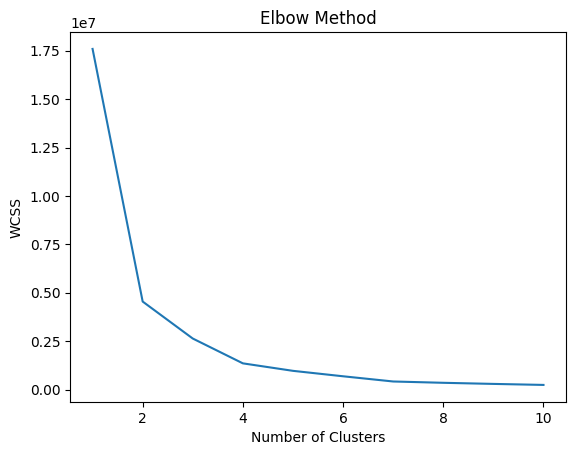

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [13]:
kMeans = KMeans(n_clusters=5,init="k-means++",random_state=42)
y_kmeans = kMeans.fit_predict(x)

In [14]:
labels = kMeans.labels_
dt['cluster']=labels

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'cluster'],
      dtype='object')


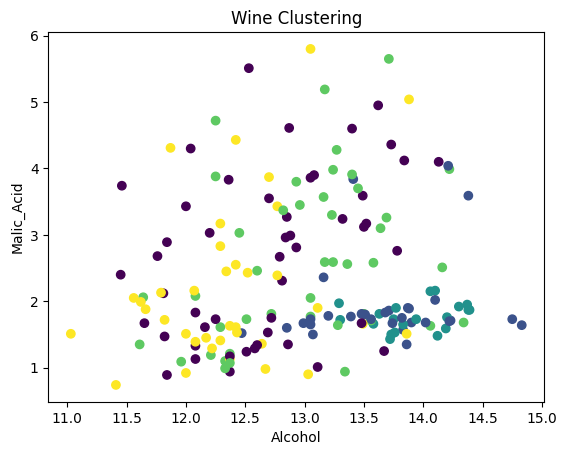

In [15]:
print(dt.columns)
plt.scatter(dt['Alcohol'], dt['Malic_Acid'], c=dt['cluster'])
plt.title('Wine Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.show()